In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Car Price Prediction.csv')

In [3]:
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [4]:
df.shape

(28143, 8)

In [5]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [6]:
df.describe()

,model_year,miles_per_gallon,premium_version,msrp,collection_car
count,28143.000000,28126.000000,28143.000000,2.812600e+04,28143.000000
mean,2013.456774,21.769242,0.533525,5.736535e+04,0.137299
std,6.847536,13.472177,0.498884,6.146327e+04,0.344169
min,1974.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,2009.000000,17.000000,0.000000,3.000000e+04,0.000000
50%,2015.000000,20.000000,1.000000,4.120000e+04,0.000000
75%,2019.000000,24.000000,1.000000,6.400000e+04,0.000000
max,2024.000000,234.000000,1.000000,2.500000e+06,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df['brand'].nunique()

57

In [9]:
df['model'].nunique()

1898

In [10]:
df = df.drop(columns=['model'])

In [11]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,SUV,13.0,1,84900.0,0
1,2014,RAM,Van,15.0,0,35000.0,0
2,2002,Ford,Coupe,16.0,0,26250.0,0
3,2012,BMW,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,Coupe,18.0,0,25000.0,0
28140,2018,Ford,SUV,94.0,1,199000.0,1
28141,2022,Land,SUV,20.0,1,63700.0,0


In [12]:
df.shape

(28143, 7)

In [13]:
df['miles_per_gallon'].median()

20.0

In [14]:
df['miles_per_gallon'].fillna(df['miles_per_gallon'].median(), inplace = True)

/var/folders/f1/f5y19fcx7070w2xg9472pbrm0000gn/T/ipykernel_10979/2401204316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['miles_per_gallon'].fillna(df['miles_per_gallon'].median(), inplace = True)


In [15]:
df.isnull().sum()

model_year           0
brand                0
type                 0
miles_per_gallon     0
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [16]:
df['msrp'].fillna(df['msrp'].median(), inplace = True)

/var/folders/f1/f5y19fcx7070w2xg9472pbrm0000gn/T/ipykernel_10979/3548541282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['msrp'].fillna(df['msrp'].median(), inplace = True)


In [17]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,SUV,13.0,1,84900.0,0
1,2014,RAM,Van,15.0,0,35000.0,0
2,2002,Ford,Coupe,16.0,0,26250.0,0
3,2012,BMW,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,Coupe,18.0,0,25000.0,0
28140,2018,Ford,SUV,94.0,1,199000.0,1
28141,2022,Land,SUV,20.0,1,63700.0,0


In [18]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)


In [19]:
cat

['brand', 'type']

In [20]:
num

['model_year', 'miles_per_gallon', 'premium_version', 'msrp', 'collection_car']

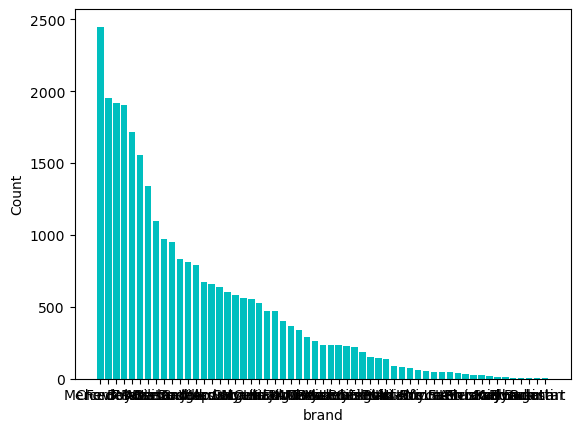

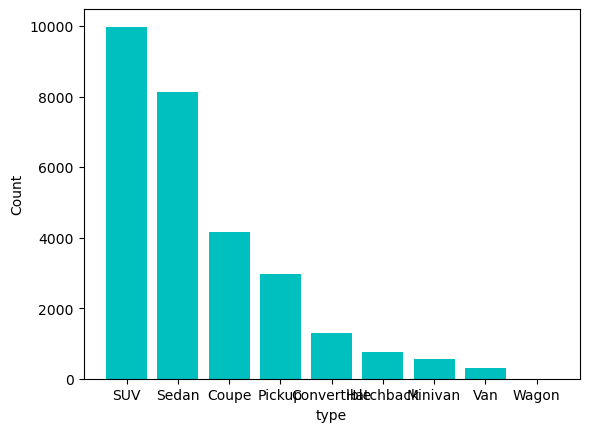

In [21]:
for i in cat:
    vc = df[i].value_counts()
    plt.bar(vc.index, height = vc , color = 'c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

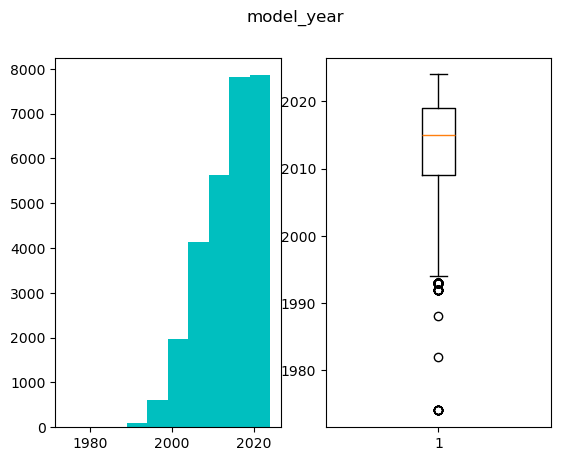

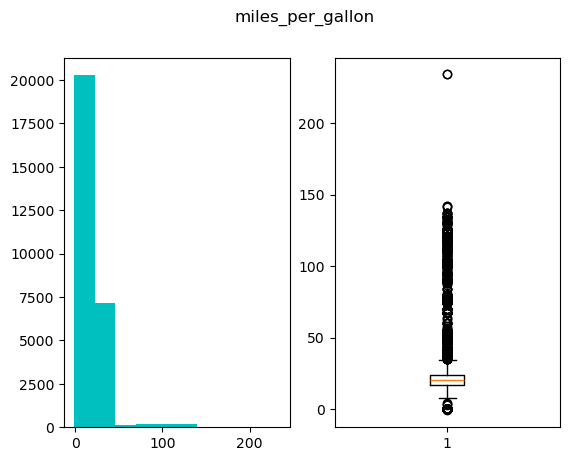

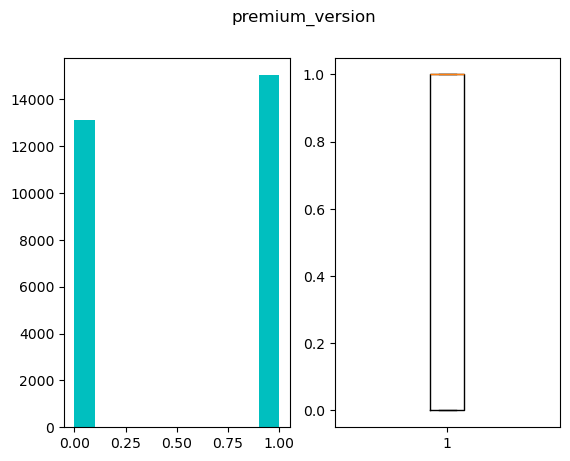

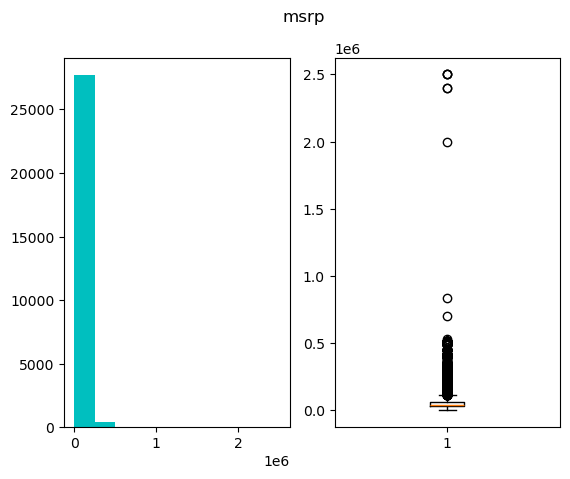

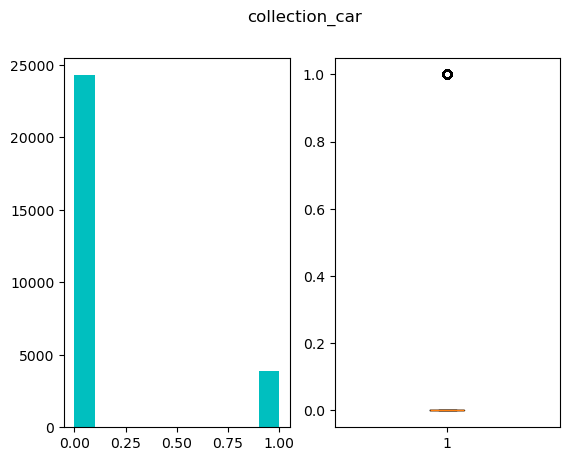

In [22]:
# Numerical

for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(df[i],color = 'c')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [23]:
# iqr winsorization --
# replace lower outliers with lower fence
# replace upper outliers with upper fence


for i in num:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - 1.5*iqr
    uf = q3 + 1.5*iqr
    df.loc[df[i]<lf,i] = lf
    df.loc[df[i]>uf,i] = uf

/var/folders/f1/f5y19fcx7070w2xg9472pbrm0000gn/T/ipykernel_10979/4170924092.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]<lf,i] = lf


In [24]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,SUV,13.0,1.0,84900.0,0
1,2014,RAM,Van,15.0,0.0,35000.0,0
2,2002,Ford,Coupe,16.0,0.0,26250.0,0
3,2012,BMW,Sedan,27.0,1.0,45000.0,0
4,2008,Mercedes-Benz,Convertible,18.0,1.0,100000.0,0
...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1.0,115000.0,0
28139,2001,Mazda,Coupe,18.0,0.0,25000.0,0
28140,2018,Ford,SUV,34.5,1.0,115000.0,0
28141,2022,Land,SUV,20.0,1.0,63700.0,0


In [25]:
# One hot encoder 

from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder(sparse_output = False)
type = ohe.fit_transform(df[['type']])
type

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [27]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [28]:
type_df = pd.DataFrame(type, columns = ohe.categories_)
type_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
type_df.drop('Convertible', axis = 1, inplace = True)


In [30]:
type_df

,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
df = pd.concat([df, type_df], axis = 1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,Toyota,SUV,13.0,1.0,84900.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0.0,35000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,Ford,Coupe,16.0,0.0,26250.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1.0,45000.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1.0,100000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1.0,115000.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0.0,25000.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,34.5,1.0,115000.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1.0,63700.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
ohe = OneHotEncoder(sparse_output = False)
brand = ohe.fit_transform(df[['brand']])
brand

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
ohe.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [34]:
brand_df = pd.DataFrame(brand, columns = ohe.categories_)
brand_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
brand_df.drop('Acura',axis = 1 ,inplace = True)
brand_df

,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,Chrysler,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df = pd.concat([df, brand_df], axis = 1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Coupe,)","(Hatchback,)","(Minivan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1.0,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0.0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0.0,26250.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1.0,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1.0,100000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1.0,115000.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0.0,25000.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,34.5,1.0,115000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1.0,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cat

['brand', 'type']

In [38]:
num

['model_year', 'miles_per_gallon', 'premium_version', 'msrp', 'collection_car']

In [39]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Coupe,)","(Hatchback,)","(Minivan,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1.0,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0.0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0.0,26250.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1.0,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1.0,100000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1.0,115000.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0.0,25000.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,34.5,1.0,115000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1.0,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
x = df.drop(['type','brand','msrp','model_year'], axis = 1)
y = df['msrp']

In [41]:
x

,miles_per_gallon,premium_version,collection_car,"(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,13.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,21.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,18.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,34.5,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,20.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y

0         84900.0
1         35000.0
2         26250.0
3         45000.0
4        100000.0
           ...   
28138    115000.0
28139     25000.0
28140    115000.0
28141     63700.0
28142     83500.0
Name: msrp, Length: 28143, dtype: float64

In [43]:
X = x.values

In [44]:
Y = y.values

In [45]:
X

array([[13. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [15. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [16. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [34.5,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [20. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [22. ,  1. ,  0. , ...,  0. ,  0. ,  0. ]])

In [46]:
Y

array([ 84900.,  35000.,  26250., ..., 115000.,  63700.,  83500.])

In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22514, 67)
(5629, 67)
(22514,)
(5629,)


In [49]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [50]:
y_train_pred = lr_model.predict(x_train)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np  # For sqrt function


In [52]:
mse_t = mean_squared_error(y_train, y_train_pred)  # Correct order
rmse_t = np.sqrt(mse_t)  # RMSE = sqrt of MSE
mae_t = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)  # Correct order

# Print results
print("MSE (Train):", mse_t)
print("RMSE (Train):", rmse_t)
print("MAE (Train):", mae_t)
print("R² Score (Train):", r2_train)


MSE (Train): 291346486.924635
RMSE (Train): 17068.8747996063
MAE (Train): 12372.231173241273
R² Score (Train): 0.6341355910245687


In [53]:
y_test_pred = lr_model.predict(x_test)

In [54]:
mse_test = mean_squared_error(y_test, y_test_pred)  # Correct order
rmse_test = np.sqrt(mse_test)  # RMSE = sqrt of MSE
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)  # Correct order

# Print results
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAE (Test):", mae_test)
print("R² Score (Test):", r2_test)


MSE (Test): 288281346.95102286
RMSE (Test): 16978.849989060593
MAE (Test): 12361.98723164638
R² Score (Test): 0.6266243154983344


## Polynomial regression --- y = mx*2 + c¶

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

In [58]:
x_train[0].size

67

In [59]:
X_poly_train[0].size

2346

In [60]:
x_train[0]

array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [61]:
X_poly_train[0]

array([ 1., 25.,  0., ...,  0.,  0.,  0.])

In [62]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

array([27503.85796547, 31033.75933266, 45500.70366859, ...,
       29378.36406898, 33819.35503578, 50062.55913734])

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
mse_poly_train = mean_squared_error(y_train, y_poly_pred)  
rmse_poly_train = mean_squared_error(y_train, y_poly_pred) ** 0.5  # RMSE is sqrt of MSE
mae_poly_train = mean_absolute_error(y_train, y_poly_pred)  
r2_poly_train = r2_score(y_train, y_poly_pred)  

# Print results
print("MSE (Train):", mse_poly_train)
print("RMSE (Train):", rmse_poly_train)
print("MAE (Train):", mae_poly_train)
print("R² Score (Train):", r2_poly_train)

MSE (Train): 231479598.63229963
RMSE (Train): 15214.453609390632
MAE (Train): 10714.197649154738
R² Score (Train): 0.7093146808206277


In [65]:
y_poly_test_pred = poly_model.predict(X_poly_test)

In [66]:
# Calculating evaluation metrics
mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)
rmse_poly_test = mse_poly_test ** 0.5  # RMSE is the square root of MSE
mae_poly_test = mean_absolute_error(y_test, y_poly_test_pred)
r2_poly_test = r2_score(y_test, y_poly_test_pred)  # Corrected order

# Printing the results
print("MSE (Test):", mse_poly_test)
print("RMSE (Test):", rmse_poly_test)
print("MAE (Test):", mae_poly_test)
print("R² Score (Test):", r2_poly_test)


MSE (Test): 2.671457347172313e+22
RMSE (Test): 163445934399.49228
MAE (Test): 4132813171.6458173
R² Score (Test): -34600130260488.156


## KNN Regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the KNN Regressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train, y_train)

# Predictions on Training Data
y_train_knn = knn_r.predict(x_train)

# Training Metrics
mse_knn_train = mean_squared_error(y_train, y_train_knn)
rmse_knn_train = mse_knn_train ** 0.5
mae_knn_train = mean_absolute_error(y_train, y_train_knn)
r2_knn_train = r2_score(y_train, y_train_knn)

print("Training Metrics:")
print("MSE:", mse_knn_train)
print("RMSE:", rmse_knn_train)
print("MAE:", mae_knn_train)
print("R² Score:", r2_knn_train)

# Predictions on Test Data
y_test_knn = knn_r.predict(x_test)

# Testing Metrics
mse_knn_test = mean_squared_error(y_test, y_test_knn)
rmse_knn_test = mse_knn_test ** 0.5
mae_knn_test = mean_absolute_error(y_test, y_test_knn)
r2_knn_test = r2_score(y_test, y_test_knn)

print("\nTesting Metrics:")
print("MSE:", mse_knn_test)
print("RMSE:", rmse_knn_test)
print("MAE:", mae_knn_test)
print("R² Score:", r2_knn_test)


Training Metrics:
MSE: 187161380.9816221
RMSE: 13680.693731738245
MAE: 8976.527138669273
R² Score: 0.764968204152124

Testing Metrics:
MSE: 214607700.62942618
RMSE: 14649.494893320594
MAE: 9621.294226327946
R² Score: 0.722044808069202


## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the SVR model
svr = SVR()
svr.fit(x_train, y_train)

# Predictions on Training Data
y_train_svr = svr.predict(x_train)

# Training Metrics
mse_svr_train = mean_squared_error(y_train, y_train_svr)  # Corrected order
rmse_svr_train = mse_svr_train ** 0.5  # Taking square root for RMSE
mae_svr_train = mean_absolute_error(y_train, y_train_svr)
r2_svr_train = r2_score(y_train, y_train_svr)

print("Training Metrics:")
print("MSE:", mse_svr_train)
print("RMSE:", rmse_svr_train)
print("MAE:", mae_svr_train)
print("R² Score:", r2_svr_train)

# Predictions on Test Data
y_test_svr = svr.predict(x_test)

# Testing Metrics
mse_svr_test = mean_squared_error(y_test, y_test_svr)
rmse_svr_test = mse_svr_test ** 0.5
mae_svr_test = mean_absolute_error(y_test, y_test_svr)
r2_svr_test = r2_score(y_test, y_test_svr)

print("\nTesting Metrics:")
print("MSE:", mse_svr_test)
print("RMSE:", rmse_svr_test)
print("MAE:", mae_svr_test)
print("R² Score:", r2_svr_test)


## Decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth = 20, random_state = 0)
dtree.fit(x_train, y_train)
y_train_dtree = dtree.predict(x_train)


mse_dtree = mean_squared_error(y_train_dtree, y_train)
rmse_dtree_train = mean_squared_error(y_train_dtree, y_train) ** 0.5
mae_dtree_train = mean_absolute_error(y_train_dtree, y_train)
r2_dtree_train = r2_score(y_train, y_train_dtree)

print(mse_dtree)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)